In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("darkgrid")

df = pd.read_csv("stats_2025-10-14_19-12-16.csv")
df.head()

,timestamp,step,current_temp_c,ambient_temp_c,action,watts_on,spot_price,heating_rate,cooling_coeff,predicted_temp_c,predicted_power,cost_dkk_per_step,cumulative_cost_dkk
0,2025-10-14T19:12:22.176015,0,20.312,12.6,OFF,0.0,3.04140,1.5,0.040000,20.00352,0.0,0.0,0.0
1,2025-10-14T19:27:24.831055,1,20.312,12.6,OFF,0.0,3.04140,1.5,0.040000,20.00352,0.0,0.0,0.0
2,2025-10-14T19:42:27.038115,2,20.000,12.6,ON,0.0,3.04140,1.5,0.030000,21.27800,0.0,0.0,0.0
3,2025-10-14T19:57:29.343350,3,20.250,12.6,OFF,0.0,3.04140,0.5,0.030000,20.02050,0.0,0.0,0.0
4,2025-10-14T20:12:31.699581,4,20.187,11.9,OFF,0.0,1.68406,0.5,0.017707,20.04026,0.0,0.0,0.0


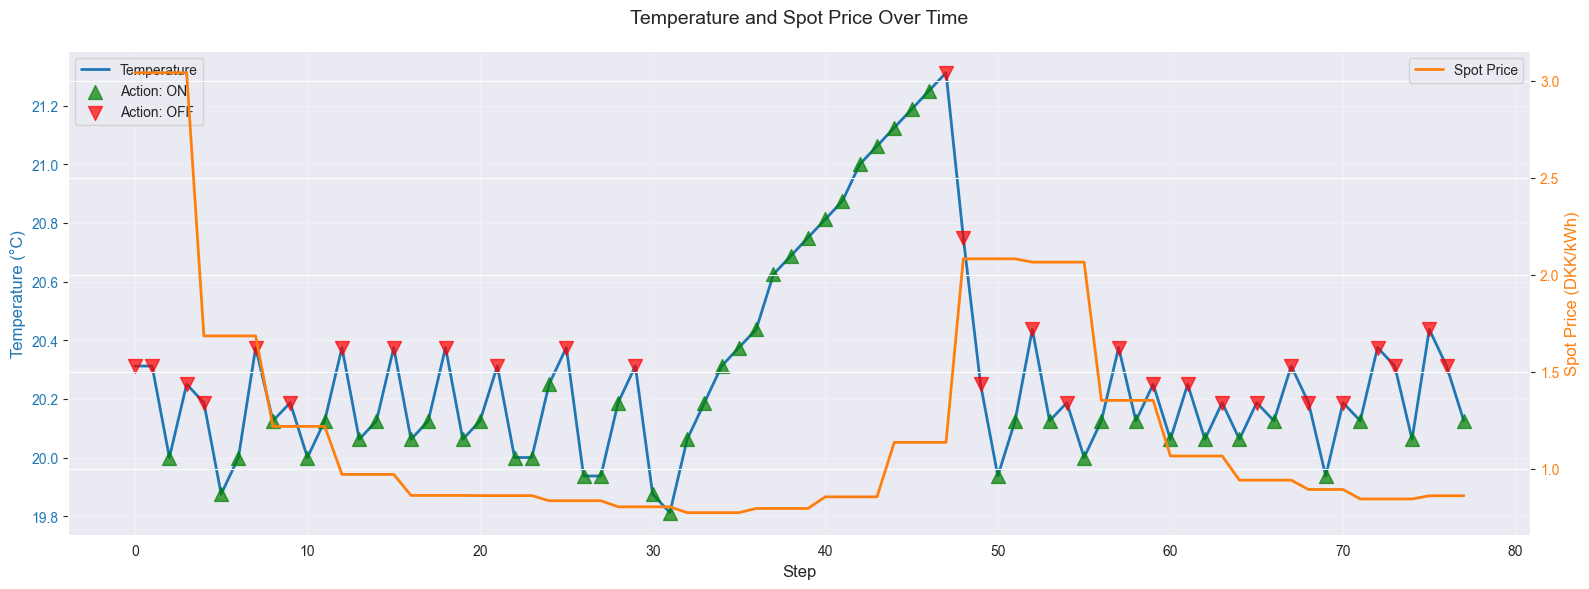

In [15]:
fig, ax1 = plt.subplots(figsize=(16, 6))

# Plot temperature on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Step', fontsize=12)
ax1.set_ylabel('Temperature (°C)', color=color, fontsize=12)
ax1.plot(df['step'], df['current_temp_c'], color=color, linewidth=2, label='Temperature')
ax1.tick_params(axis='y', labelcolor=color)

# Add triangle indicators for ON/OFF actions
df_on = df[df['action'] == 'ON']
df_off = df[df['action'] == 'OFF']

ax1.scatter(df_on['step'], df_on['current_temp_c'], marker='^', s=100, 
            color='green', alpha=0.7, label='Action: ON', zorder=5)
ax1.scatter(df_off['step'], df_off['current_temp_c'], marker='v', s=100, 
            color='red', alpha=0.7, label='Action: OFF', zorder=5)

# Create a second y-axis for spot price on the right
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Spot Price (DKK/kWh)', color=color, fontsize=12)
ax2.plot(df['step'], df['spot_price'], color=color, linewidth=2, label='Spot Price')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and grid
plt.title('Temperature and Spot Price Over Time', fontsize=14, pad=20)
ax1.grid(True, alpha=0.3)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()